<a href="https://colab.research.google.com/github/mohanrajmit/Image-Read/blob/master/Convolutions_Sidebar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np

In [8]:
!git clone https://github.com/mohanrajmit/Image-Read.git

fatal: destination path 'Image-Read' already exists and is not an empty directory.


In [0]:
img = cv2.imread("/content/Image-Read/1.jpg")

img = cv2.resize(img,(100,100))

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

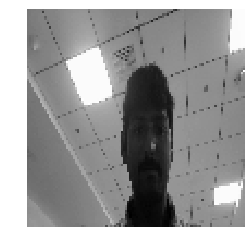

In [23]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.gray()
plt.imshow(gray)
plt.show()

In [0]:
i_transformed = np.copy(gray)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [18]:
print(size_x)
print(size_y)

100
100


In [0]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [20]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (gray[x - 1, y-1] * filter[0][0])
      convolution = convolution + (gray[x, y-1] * filter[0][1])
      convolution = convolution + (gray[x + 1, y-1] * filter[0][2])
      convolution = convolution + (gray[x-1, y] * filter[1][0])
      convolution = convolution + (gray[x, y] * filter[1][1])
      convolution = convolution + (gray[x+1, y] * filter[1][2])
      convolution = convolution + (gray[x-1, y+1] * filter[2][0])
      convolution = convolution + (gray[x, y+1] * filter[2][1])
      convolution = convolution + (gray[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      print(convolution)
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

15.0
12.0
7.0
5.0
5.0
-109.0
3.0
121.0
8.0
6.0
-1.0
6.0
15.0
14.0
14.0
12.0
12.0
7.0
6.0
10.0
10.0
5.0
4.0
4.0
1.0
-2.0
-102.0
-18.0
81.0
0.0
0.0
-4.0
-7.0
-12.0
-16.0
-10.0
-12.0
-16.0
-4.0
-3.0
-1.0
1.0
-4.0
0.0
2.0
1.0
0.0
0.0
-92.0
-5.0
96.0
10.0
-6.0
-1.0
0.0
-7.0
0.0
1.0
-4.0
0.0
-36.0
-38.0
-68.0
-39.0
-54.0
2.0
93.0
54.0
69.0
30.0
-8.0
-9.0
10.0
5.0
3.0
1.0
4.0
9.0
8.0
3.0
6.0
8.0
5.0
9.0
12.0
13.0
12.0
12.0
23.0
27.0
30.0
-68.0
308.0
394.0
3.0
3.0
0.0
0.0
16.0
11.0
3.0
8.0
10.0
-45.0
-28.0
54.0
32.0
7.0
3.0
4.0
12.0
16.0
17.0
12.0
14.0
10.0
9.0
11.0
8.0
5.0
4.0
3.0
3.0
-1.0
-48.0
-23.0
27.0
3.0
-2.0
-2.0
-8.0
-11.0
-13.0
-12.0
-13.0
-16.0
-5.0
-6.0
-3.0
4.0
-1.0
-3.0
0.0
4.0
2.0
2.0
-180.0
-7.0
183.0
9.0
-5.0
-3.0
-3.0
-7.0
-3.0
5.0
-49.0
-58.0
-57.0
-13.0
-40.0
30.0
71.0
36.0
84.0
9.0
0.0
1.0
-14.0
-7.0
13.0
4.0
4.0
5.0
3.0
4.0
5.0
5.0
5.0
10.0
10.0
7.0
10.0
12.0
13.0
16.0
24.0
28.0
37.0
-71.0
294.0
389.0
4.0
4.0
0.0
0.0
14.0
5.0
4.0
14.0
11.0
6.0
-73.0
-3.0
76.0
10.0
8.0
2.0

Now we can plot the image to see the effect of the convolution!

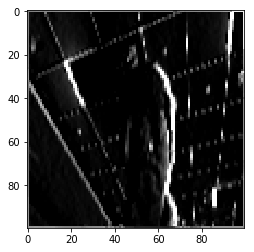

In [21]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

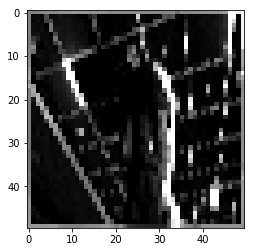

In [22]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    